In [20]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [21]:
from google.colab import drive

In [22]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:

IMAGE_SIZE = 256
CHANNELS = 3    


#Import data into tensorflow dataset object
Used splitfolders tool to split dataset into training, validation and test directories.

$ pip install split-folders

$ splitfolders --ratio 0.8 0.1 0.1 -- ./training/PlantVillage/

In [24]:

train_datagen = ImageDataGenerator(
        rescale= 1./255,
        rotation_range=10,
        horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/Potato-disease/dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse", # sparse ka use check tensorflow official site / google
        #save_to_dir="/content/drive/MyDrive/Colab Notebooks/Potato-disease/AugmentedImages"
)

Found 1506 images belonging to 3 classes.


In [25]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [26]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [27]:
dir(train_generator)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_filepaths',
 '_flow_index',
 '_get_batches_of_transformed_samples',
 '_keras_api_names',
 '_keras_api_names_v1',
 '_set_index_array',
 'allowed_class_modes',
 'batch_index',
 'batch_size',
 'class_indices',
 'class_mode',
 'classes',
 'color_mode',
 'data_format',
 'directory',
 'dtype',
 'filenames',
 'filepaths',
 'image_data_generator',
 'image_shape',
 'index_array',
 'index_generator',
 'interpolation',
 'keep_aspect_ratio',
 'labels',
 'lock',
 'n',
 'next',
 'num_classes',
 'on_epoch_end',
 'reset',
 'sample_weight',
 'samples',
 'save_format',
 'save_prefix',

In [28]:
count=0
for image_batch, label_batch in train_generator:
    print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 2. 1. 2. 1. 0. 1.
 1. 0. 0. 1. 1. 0. 1. 0.]
[[[0.5151502  0.5033855  0.54652274]
  [0.5151085  0.5033438  0.5464811 ]
  [0.535765   0.5240003  0.56713754]
  ...
  [0.6434884  0.62780213 0.6827041 ]
  [0.6517013  0.636015   0.69091696]
  [0.66381735 0.6481311  0.70303303]]

 [[0.51194924 0.50018454 0.5433218 ]
  [0.5121161  0.50035137 0.5434886 ]
  [0.5075639  0.49579915 0.53893644]
  ...
  [0.6433633  0.627677   0.682579  ]
  [0.65190977 0.6362235  0.69112545]
  [0.66390073 0.64821446 0.7031164 ]]

 [[0.5461123  0.5343476  0.57748485]
  [0.5448193  0.5330546  0.57619184]
  [0.52738816 0.51562345 0.5587607 ]
  ...
  [0.65545106 0.6397648  0.69466674]
  [0.6625644  0.6468781  0.70178014]
  [0.66324407 0.6475578  0.70245975]]

 ...

 [[0.58595574 0.5781126  0.59772044]
  [0.61070824 0.6028651  0.62247294]
  [0.6270447  0.61920154 0.6388094 ]
  ...
  [0.79424256 0.7863994  0.80600727]
  [0.7958525  0.78800935 0.8076172 ]
  [0.7957274  

In [29]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

validation_generator = validation_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/Potato-disease/dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)


Found 215 images belonging to 3 classes.


In [30]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/Potato-disease/dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 431 images belonging to 3 classes.


In [31]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.6195389  0.5332644  0.5450291 ]
  [0.61582315 0.52954865 0.54131335]
  [0.63907534 0.55280083 0.56456554]
  ...
  [0.7035424  0.60942477 0.60942477]
  [0.70894456 0.6148269  0.6148269 ]
  [0.7139326  0.61981493 0.61981493]]

 [[0.6233264  0.5370519  0.5488166 ]
  [0.61626375 0.52998924 0.54175395]
  [0.6354739  0.5491994  0.5609641 ]
  ...
  [0.72195727 0.6278396  0.6278396 ]
  [0.723758   0.62964034 0.62964034]
  [0.72539896 0.6312813  0.6312813 ]]

 [[0.6275281  0.54125357 0.5530183 ]
  [0.61686397 0.53058946 0.54235417]
  [0.6318725  0.545598   0.5573627 ]
  ...
  [0.71469945 0.6205818  0.6205818 ]
  [0.7122985  0.6181809  0.6181809 ]
  [0.7098976  0.6157799  0.6157799 ]]

 ...

 [[0.5567692  0.42343584 0.41951427]
  [0.55436826 0.4210349  0.41711333]
  [0.55196726 0.41863394 0.41471237]
  ...
  [0.59607846 0.46274513 0.454902  ]
  [0.5949008  0.46156746 0.45372432]
  [0.5864996  0.45316628 0.44532314]]

 [[0.54126775 0.40793443 0.40401286]
  [0.5411765  0.40784317 0.4039216 ]


# Creating/Building Model Using CNN

In [32]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3 # here i am taking three neurons

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(n_classes, activation= 'softmax')

])
model.build(input_shape = input_shape)


In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 30, 30, 64)      

#Compiling the model 

In [34]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


In [35]:
1506/32

47.0625

In [36]:
215/32

6.71875

#Fitting Model

In [37]:
history = model.fit(
     train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20,
)

Epoch 1/20
47/47 [==============================] - 33s 643ms/step - loss: 0.8900 - accuracy: 0.5142 - val_loss: 0.8906 - val_accuracy: 0.4792
Epoch 2/20
47/47 [==============================] - 29s 619ms/step - loss: 0.5641 - accuracy: 0.7571 - val_loss: 0.4305 - val_accuracy: 0.7760
Epoch 3/20
47/47 [==============================] - 30s 636ms/step - loss: 0.3888 - accuracy: 0.8399 - val_loss: 0.4029 - val_accuracy: 0.8073
Epoch 4/20
47/47 [==============================] - 29s 622ms/step - loss: 0.2910 - accuracy: 0.8847 - val_loss: 0.2699 - val_accuracy: 0.8906
Epoch 5/20
47/47 [==============================] - 30s 639ms/step - loss: 0.2316 - accuracy: 0.9037 - val_loss: 0.2265 - val_accuracy: 0.9167
Epoch 6/20
47/47 [==============================] - 31s 657ms/step - loss: 0.1653 - accuracy: 0.9417 - val_loss: 0.1740 - val_accuracy: 0.9531
Epoch 7/20
47/47 [==============================] - 28s 607ms/step - loss: 0.1302 - accuracy: 0.9532 - val_loss: 0.1551 - val_accuracy: 0.9427

In [38]:
scores = model.evaluate(test_generator)

14/14 [==============================] - 135s 10s/step - loss: 0.1292 - accuracy: 0.9582


In [39]:
scores

[0.12917394936084747, 0.9582366347312927]

#Plotting the Accuracy and Loss Curves

In [40]:
history

In [41]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 47}

In [42]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [43]:
type(history.history['loss'])

list

In [44]:
len(history.history['loss'])

20

In [45]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.8899863958358765,
 0.5640544295310974,
 0.3888416886329651,
 0.29095008969306946,
 0.23163491487503052]

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [47]:
val_acc

[0.4791666567325592,
 0.7760416865348816,
 0.8072916865348816,
 0.890625,
 0.9166666865348816,
 0.953125,
 0.9427083134651184,
 0.9427083134651184,
 0.921875,
 0.96875,
 0.921875,
 0.9739583134651184,
 0.9322916865348816,
 0.9635416865348816,
 0.9635416865348816,
 0.9635416865348816,
 0.9375,
 0.921875,
 0.9166666865348816,
 0.9739583134651184]

In [48]:
acc

[0.514246940612793,
 0.7571234703063965,
 0.8398914337158203,
 0.8846675753593445,
 0.9036635160446167,
 0.9416553378105164,
 0.9531885981559753,
 0.9382632374763489,
 0.9450474977493286,
 0.9525101780891418,
 0.9396200776100159,
 0.9402984976768494,
 0.9613296985626221,
 0.9382632374763489,
 0.9565807580947876,
 0.9613296985626221,
 0.9416553378105164,
 0.9572591781616211,
 0.9660786986351013,
 0.9660786986351013]

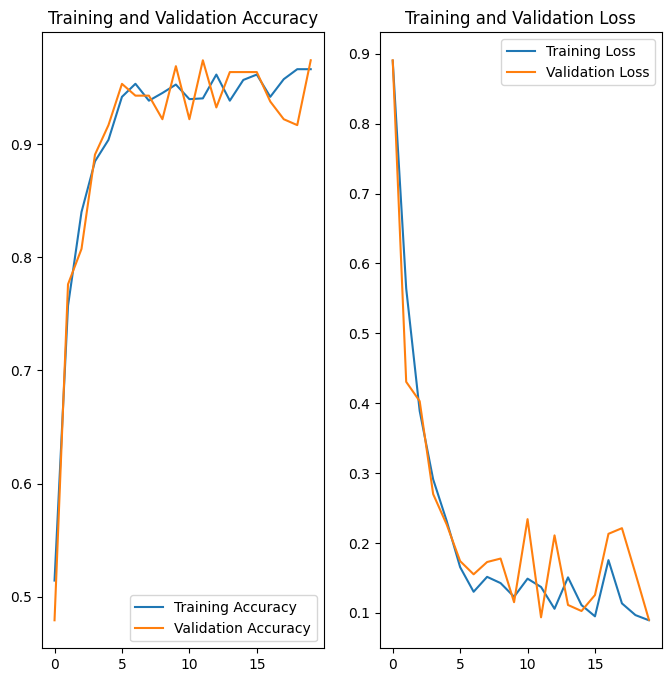

In [49]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#Plotting

In [50]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss =history.history['loss']
val_loss = history.history['val_loss']

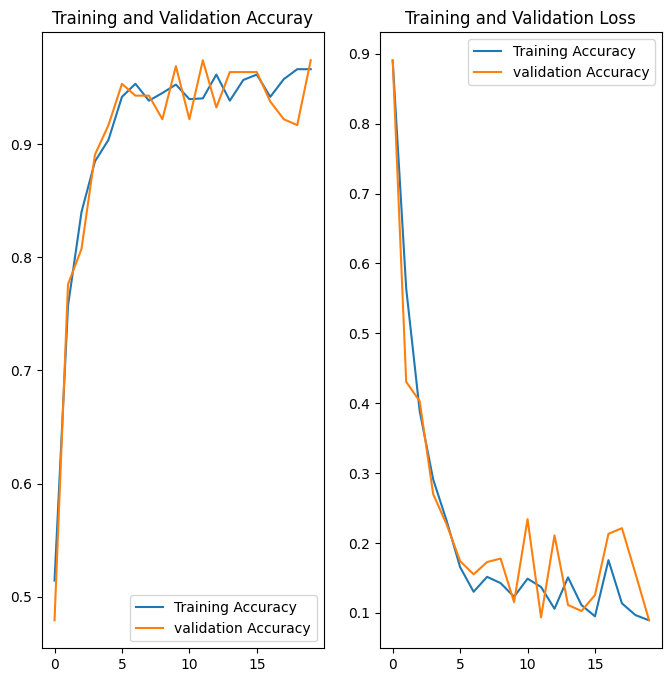

In [51]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuray')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label='Training Accuracy')
plt.plot(range(EPOCHS), val_loss, label='validation Accuracy')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#Run Prediction on a sample image

first image to predict
actual label: Potato___Early_blight
1/1 [==============================] - 1s 786ms/step
predicted label: Potato___Early_blight


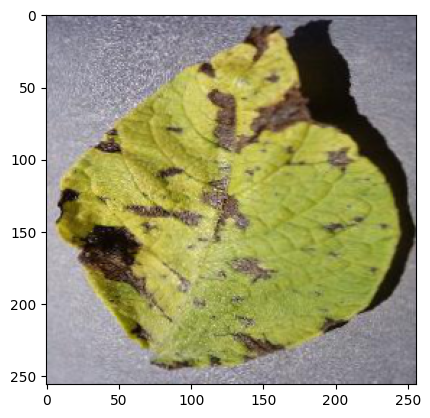

In [54]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break
    

In [55]:
np.argmax([6.558184e-04, 9.947864e-01, 4.557779e-03])
# its take heigher value of index 


1

In [56]:
print("predicted label:", class_names[np.argmax(batch_prediction[0])])

predicted label: Potato___Early_blight


#Write a function for inference

In [57]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

Now run inference on few sample images

In [58]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [ ]:
model.save("/content/drive/MyDrive/Colab Notebooks/Potato-disease/potatoes.h5")